In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas

from weave_units import WeaveUnit
from tile_map import Tiling

<AxesSubplot:>

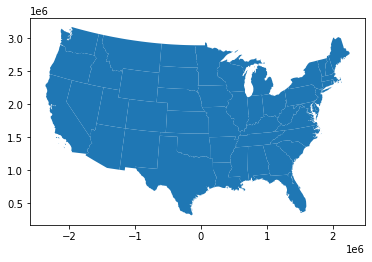

In [2]:
us = geopandas.read_file("../data/states.gpkg")
us['d'] = us.dem / us.votes * 100
us['r'] = us.gop / us.votes * 100
us['g'] = us.grn / us.votes * 100
us['l'] = us.lib / us.votes * 100
us.plot()

In [3]:
w3 = WeaveUnit(spacing = 25000, aspect = 1.,
                    margin = 0, strands = "ab|--", crs = us.crs)

tiling = Tiling(w3, us, id_var = "state")

In [6]:
election_map = tiling.get_tiled_map(rotation = 30, prioritise_tiles = False)

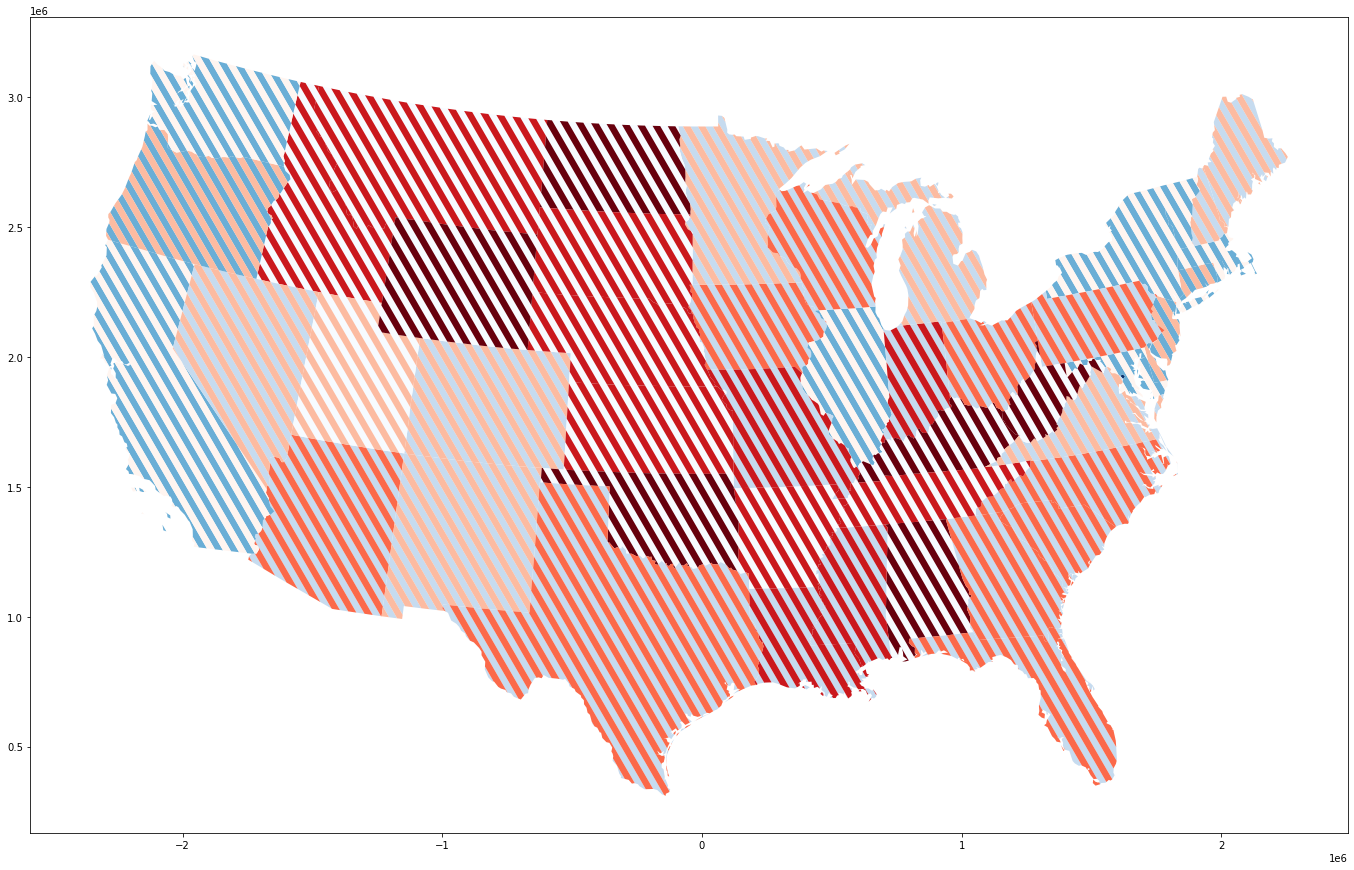

In [7]:
election_map = election_map
fig = pyplot.figure(figsize = (24, 15))
ax = fig.add_subplot(111)

strands = set(election_map.element_id)
cols = ["d", "r", "g", "l"]
cmaps = ("Blues", "Reds", "Greens", "Purples")

for strand, col, cmap in zip(strands, cols, cmaps):
    election_map[election_map.element_id == strand].plot(ax = ax, column = col, 
                                                 cmap = cmap,
                                                 scheme = "equal_interval", 
                                                 linewidth = 0)